## Introduction
***

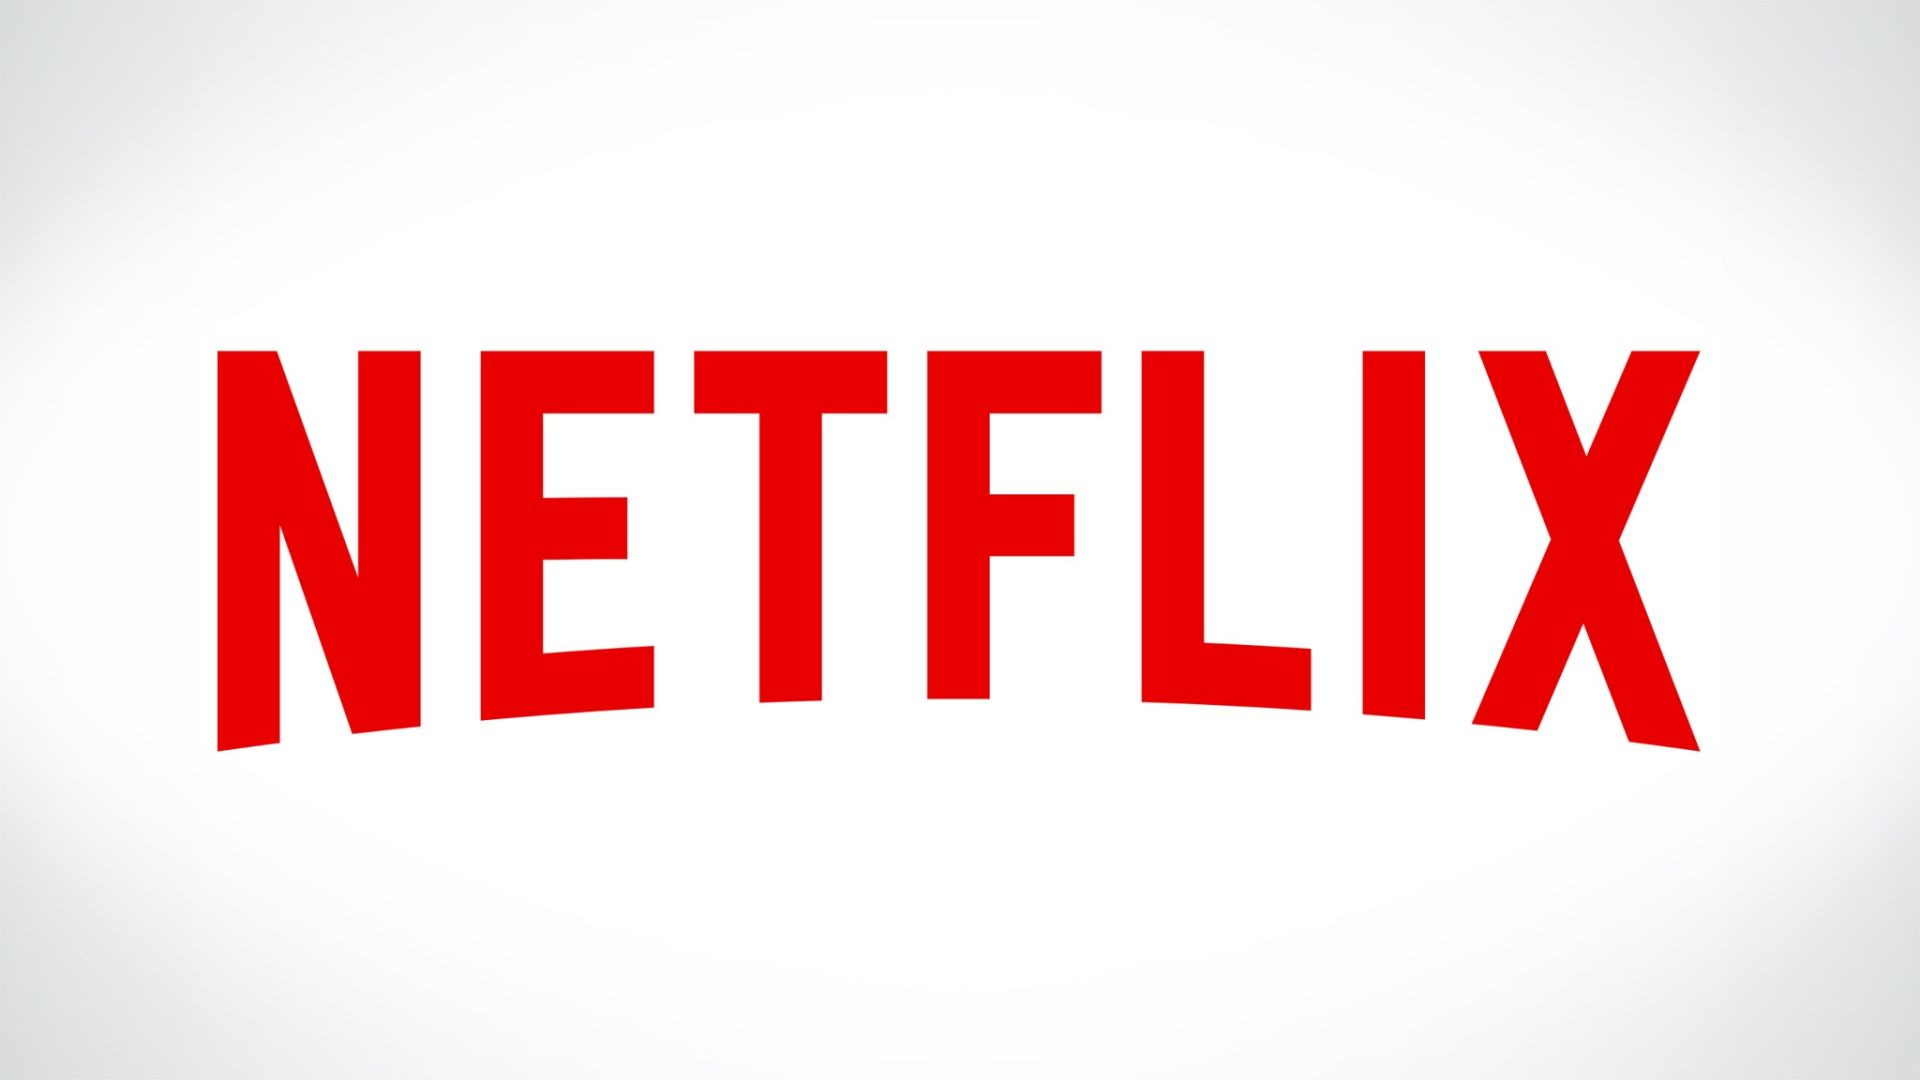

In this project, we will act as a data visualization developer at Yahoo Finance! We will be helping the "Netflix Stock Profile" team visualize the Netflix stock data. 

For the purposes of the project, we will only visualize data for the year of 2017. Here is what we are going to show:

+ The distribution of the stock prices for the past year
+ Netflix's earnings and revenue in the last four quarters
+ The actual vs. estimated earnings per share for the four quarters in 2017
+ A comparison of the Netflix Stock price vs the Dow Jones Industrial Average price in 2017 

Note: We are using the Dow Jones Industrial Average to compare the Netflix stock to the larger stock market.

Our visualizations will help the financial analysts figure the risk of the Netflix stock.

After we complete our visualizations, we will be creating a presentation to share the images with the rest of the Netflix Stock Profile team. The slides should include:

- A title slide
- A list of your visualizations and your role in their creation for the "Stock Profile" team
- A visualization of the distribution of the stock prices for Netflix in 2017
- A visualization and a summary of Netflix stock and revenue for the past four quarters and a summary
- A visualization and a brief summary of their earned versus actual earnings per share
- A visualization of Netflix stock against the Dow Jones stock (to get a sense of the market) in 2017

Financial Data Source: [Yahoo Finance](https://finance.yahoo.com/quote/DATA/)


## Import Libraries

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

### Inspect the Data

The data you will use for creating your visualizations come from the following datasets:

 - `NFLX` is the stock ticker symbol for Netflix and `^DJI` is the stock ticker symbol for the Dow Jones industrial Average, which is why the CSV files are named accordingly
 - In the Yahoo Data, `Adj Close` is documented as adjusted close price adjusted for both dividends and splits.

While inspecting the variables, ask yourself questions about the data such as:

- Is the data represented by days, weeks, or months? 
- In which ways are the files different? 
- What's different about the columns for `netflix_stocks` versus `netflix_stocks_quarterly`?

In [22]:
# Netflix Stocks Dataset = df1
df1 = pd.read_csv("NFLX.csv")
df1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-01,124.959999,143.460007,124.309998,140.710007,140.710007,181772200
1,2017-02-01,141.199997,145.949997,139.050003,142.130005,142.130005,91432000
2,2017-03-01,142.839996,148.289993,138.259995,147.809998,147.809998,110692700
3,2017-04-01,146.699997,153.520004,138.660004,152.199997,152.199997,149769200
4,2017-05-01,151.910004,164.750000,151.610001,163.070007,163.070007,116795800
5,2017-06-01,163.520004,166.869995,147.300003,149.410004,149.410004,135675800
6,2017-07-01,149.800003,191.500000,144.250000,181.660004,181.660004,185144700
7,2017-08-01,182.490005,184.619995,164.229996,174.710007,174.710007,136523100
8,2017-09-01,175.550003,189.949997,172.440002,181.350006,181.350006,111427900
9,2017-10-01,182.110001,204.380005,176.580002,196.429993,196.429993,208657800


In [23]:
# Dow Jones Stocks Dataset = df2
df2 = pd.read_csv("DJI.csv")
df2

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-01,19872.859375,20125.580078,19677.939453,19864.089844,19864.089844,6482450000
1,2017-02-01,19923.810547,20851.330078,19831.089844,20812.240234,20812.240234,6185580000
2,2017-03-01,20957.289063,21169.109375,20412.800781,20663.220703,20663.220703,6941970000
3,2017-04-01,20665.169922,21070.900391,20379.550781,20940.509766,20940.509766,5392630000
4,2017-05-01,20962.730469,21112.320313,20553.449219,21008.650391,21008.650391,6613570000
5,2017-06-01,21030.550781,21535.029297,20994.220703,21349.630859,21349.630859,7214590000
6,2017-07-01,21392.300781,21929.800781,21279.300781,21891.119141,21891.119141,5569720000
7,2017-08-01,21961.419922,22179.109375,21600.339844,21948.099609,21948.099609,6150060000
8,2017-09-01,21981.769531,22419.509766,21709.630859,22405.089844,22405.089844,6342130000
9,2017-10-01,22423.470703,23485.250000,22416.000000,23377.240234,23377.240234,7302910000


In [24]:
netflix_quarterly_data = pd.read_csv("NFLX_daily_by_quarter.csv")
netflix_quarterly_data

,Date,Open,High,Low,Close,Adj Close,Volume,Quarter
0,2017-01-03,124.959999,128.190002,124.309998,127.489998,127.489998,9437900,Q1
1,2017-01-04,127.489998,130.169998,126.550003,129.410004,129.410004,7843600,Q1
2,2017-01-05,129.220001,132.750000,128.899994,131.809998,131.809998,10185500,Q1
3,2017-01-06,132.080002,133.880005,129.809998,131.070007,131.070007,10657900,Q1
4,2017-01-09,131.479996,131.990005,129.889999,130.949997,130.949997,5766900,Q1
...,...,...,...,...,...,...,...,...
246,2017-12-22,188.330002,190.949997,186.800003,189.940002,189.940002,3878900,Q4
247,2017-12-26,189.779999,189.940002,186.399994,187.759995,187.759995,3045700,Q4
248,2017-12-27,187.800003,188.100006,185.220001,186.240005,186.240005,4002100,Q4
249,2017-12-28,187.179993,194.490005,186.850006,192.710007,192.710007,10107400,Q4


1. Given by both datasets, Netflix Stocks and Dow Jones Stocks Dataset were shown by the first day of each months. Therefore it was represented by months.

2. Netflix stocks were far less compared to Dow Jones from the given 2017 Dataset. It can be seen through the amount of volume, the amount of price as well.

3. The quarterly data for Netflix Stocks were shown by dates, therefore it has more rows than the stocks data for Netflix. It is to show the quarters throughout the year.

## Rename Adj close

The term `Adj Close` is a confusing term if you don't read the Yahoo Documentation. In Yahoo, `Adj Close` is documented as adjusted close price adjusted for both dividends and splits. So we should change the name `Adj Close` column to `Price`

In [25]:
df1 = df1.rename({'Adj Close':'Price'}, axis=1)
df1 = df1.rename({'Date':'Month'}, axis=1)
df1['Month'] = pd.to_datetime(df1['Month']).dt.strftime('%B')

In [30]:
df1

,Month,Open,High,Low,Close,Price,Volume
0,January,124.959999,143.460007,124.309998,140.710007,140.710007,181772200
1,February,141.199997,145.949997,139.050003,142.130005,142.130005,91432000
2,March,142.839996,148.289993,138.259995,147.809998,147.809998,110692700
3,April,146.699997,153.520004,138.660004,152.199997,152.199997,149769200
4,May,151.910004,164.750000,151.610001,163.070007,163.070007,116795800
5,June,163.520004,166.869995,147.300003,149.410004,149.410004,135675800
6,July,149.800003,191.500000,144.250000,181.660004,181.660004,185144700
7,August,182.490005,184.619995,164.229996,174.710007,174.710007,136523100
8,September,175.550003,189.949997,172.440002,181.350006,181.350006,111427900
9,October,182.110001,204.380005,176.580002,196.429993,196.429993,208657800


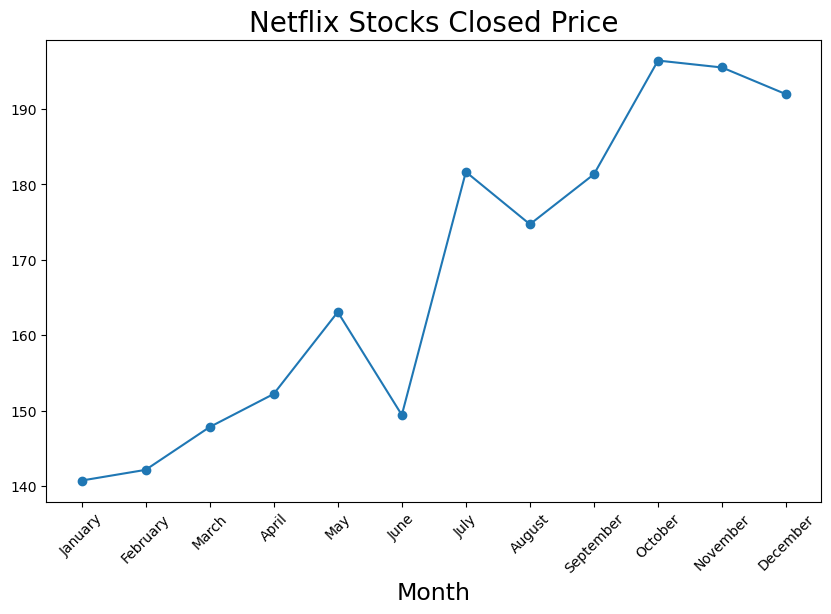

In [37]:
high = df1['High']
close = df1['Close']
price = df1['Price']

plt.figure(figsize=(10, 6))
plt.plot(df1['Month'], price, marker='o', linestyle='-')
plt.title('Netflix Stocks Closed Price', fontsize=20)
plt.xlabel('Month', fontsize=17)
plt.xticks(rotation=45)
plt.show()

In [39]:
df2 = df2.rename({'Adj Close':'Price'}, axis=1)
df2 = df2.rename({'Date':'Month'}, axis=1)
df2['Month'] = pd.to_datetime(df2['Month']).dt.strftime('%B')

In [40]:
df2

,Month,Open,High,Low,Close,Price,Volume
0,January,19872.859375,20125.580078,19677.939453,19864.089844,19864.089844,6482450000
1,February,19923.810547,20851.330078,19831.089844,20812.240234,20812.240234,6185580000
2,March,20957.289063,21169.109375,20412.800781,20663.220703,20663.220703,6941970000
3,April,20665.169922,21070.900391,20379.550781,20940.509766,20940.509766,5392630000
4,May,20962.730469,21112.320313,20553.449219,21008.650391,21008.650391,6613570000
5,June,21030.550781,21535.029297,20994.220703,21349.630859,21349.630859,7214590000
6,July,21392.300781,21929.800781,21279.300781,21891.119141,21891.119141,5569720000
7,August,21961.419922,22179.109375,21600.339844,21948.099609,21948.099609,6150060000
8,September,21981.769531,22419.509766,21709.630859,22405.089844,22405.089844,6342130000
9,October,22423.470703,23485.250000,22416.000000,23377.240234,23377.240234,7302910000


## Visualize Quarterly Data

Now its time to visualize the Netflix quarterly data! 

We want to get an understanding of the distribution of the Netflix quarterly stock prices for 2017. Specifically, we want to see in which quarter stock prices flucutated the most. We are going to use the Violin Plot for each business quarters

In [41]:
netflix_quarterly_data = pd.read_csv("NFLX_daily_by_quarter.csv")
netflix_quarterly_data = netflix_quarterly_data.rename({'Adj Close':'Price'}, axis=1)
netflix_quarterly_data = netflix_quarterly_data.rename({'Date':'Month'}, axis=1)
netflix_quarterly_data['Month'] = pd.to_datetime(netflix_quarterly_data['Month']).dt.strftime('%B')

In [42]:
netflix_quarterly_data

,Month,Open,High,Low,Close,Price,Volume,Quarter
0,January,124.959999,128.190002,124.309998,127.489998,127.489998,9437900,Q1
1,January,127.489998,130.169998,126.550003,129.410004,129.410004,7843600,Q1
2,January,129.220001,132.750000,128.899994,131.809998,131.809998,10185500,Q1
3,January,132.080002,133.880005,129.809998,131.070007,131.070007,10657900,Q1
4,January,131.479996,131.990005,129.889999,130.949997,130.949997,5766900,Q1
...,...,...,...,...,...,...,...,...
246,December,188.330002,190.949997,186.800003,189.940002,189.940002,3878900,Q4
247,December,189.779999,189.940002,186.399994,187.759995,187.759995,3045700,Q4
248,December,187.800003,188.100006,185.220001,186.240005,186.240005,4002100,Q4
249,December,187.179993,194.490005,186.850006,192.710007,192.710007,10107400,Q4


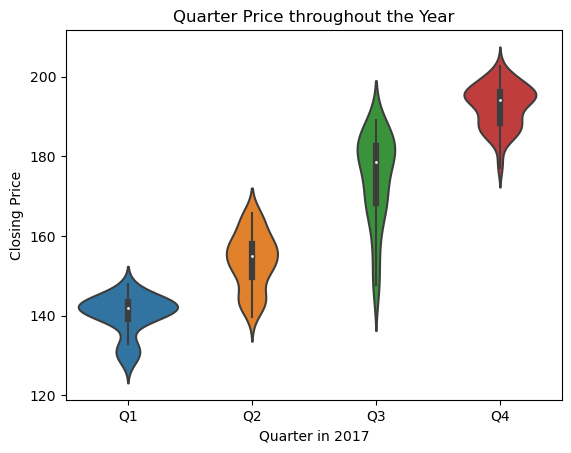

In [43]:
ax = sns.violinplot(x='Quarter', y='Price', data=netflix_quarterly_data)
ax.set_title("Quarter Price throughout the Year")
ax.set_ylabel("Closing Price")
ax.set_xlabel("Quarter in 2017")
plt.savefig("violin_plot.png")
plt.show()

- What are your first impressions looking at the visualized data?

- In what range(s) did most of the prices fall throughout the year?

- What were the highest and lowest prices? 

1. Based on the plot, Netflix Stock Prices kept increasing throughout the year from the first quarter until the fourth.

2. During the third quarter it appears that the price experience a significant dip but closed at around 170. So it kept increasing.

## Measure Performance of Earnings per Share

Next, we will chart the performance of the earnings per share (EPS) by graphing the estimate Yahoo projected for the Quarter compared to the actual earnings for that quarters. We will accomplish this using a scatter plot. 

The following lists is needed to create the scatter plot:

In [44]:
# Set distinct values to seperate quarters 
x_positions = [1, 2, 3, 4]

# Label each of the quarters
chart_labels = ["1Q2017","2Q2017","3Q2017","4Q2017"]

# Actual earnings per share
earnings_actual =[.4, .15, .29, .41]

# Estimated projected earnings per share
earnings_estimate = [.37, .15, .32, .41]

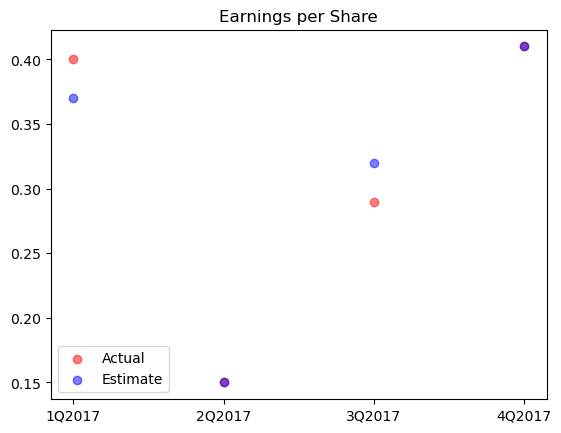

In [45]:
fig, ax = plt.subplots()
plt.scatter(x_positions, earnings_actual, color='red', alpha=0.5)
plt.scatter(x_positions, earnings_estimate, color='blue', alpha=0.5)

plt.legend(['Actual', 'Estimate'])
plt.xticks(x_positions, chart_labels)
plt.title('Earnings per Share')
plt.savefig("eps_scatter_plot.png")
plt.show()

## Visualize Earnings and Revenue Side by Side

Next, we will visualize the earnings and revenue reported by Netflix by mapping two bars side-by-side.

In [46]:
# The metrics below are in billions of dollars
# Reported values from Netflix
revenue_by_quarter = [2.79, 2.98,3.29,3.7]
earnings_by_quarter = [.0656,.12959,.18552,.29012]

# Quarter labels list

quarter_labels = ["2Q2017","3Q2017","4Q2017", "1Q2018"]

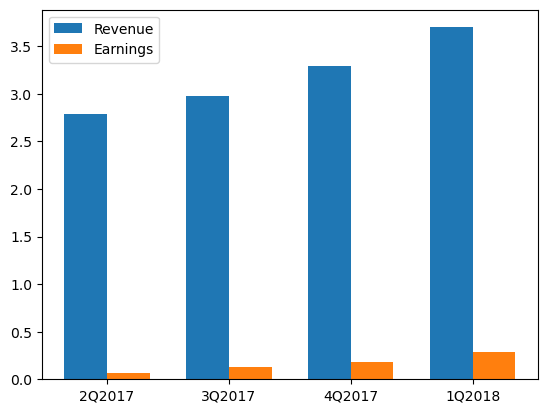

In [47]:
index = np.arange(len(quarter_labels))
bar_width = 0.35
fig, ax = plt.subplots()
revenue_bar = ax.bar(index - bar_width/2, revenue_by_quarter, bar_width)
earnings_bar = ax.bar(index + bar_width/2, earnings_by_quarter, bar_width)

ax.set_xticks(index)
ax.set_xticklabels(quarter_labels)
ax.legend(['Revenue', 'Earnings'])
plt.savefig("RevenueVsEarnings")
plt.show()


What are your first impressions looking at the visualized data?

- Does Revenue follow a trend?
- Do Earnings follow a trend?
- Roughly, what percentage of the revenue constitutes earnings?

Although it increasing throughout the year, The difference between both Revenue and Earnings is a lot. It seems that the company is bringing in more money than it is keeping as profit. The company may be spending a lot of money on research and development, marketing, or other expenses.

## Comparing to the Dow Jones Industrial Average


In this last step, we will compare Netflix stock to the Dow Jones Industrial Average in 2017. We will accomplish this by plotting two line charts side by side in one figure. 

- How did Netflix perform relative to Dow Jones Industrial Average in 2017?
- Which was more volatile?
- How do the prices of the stocks compare?

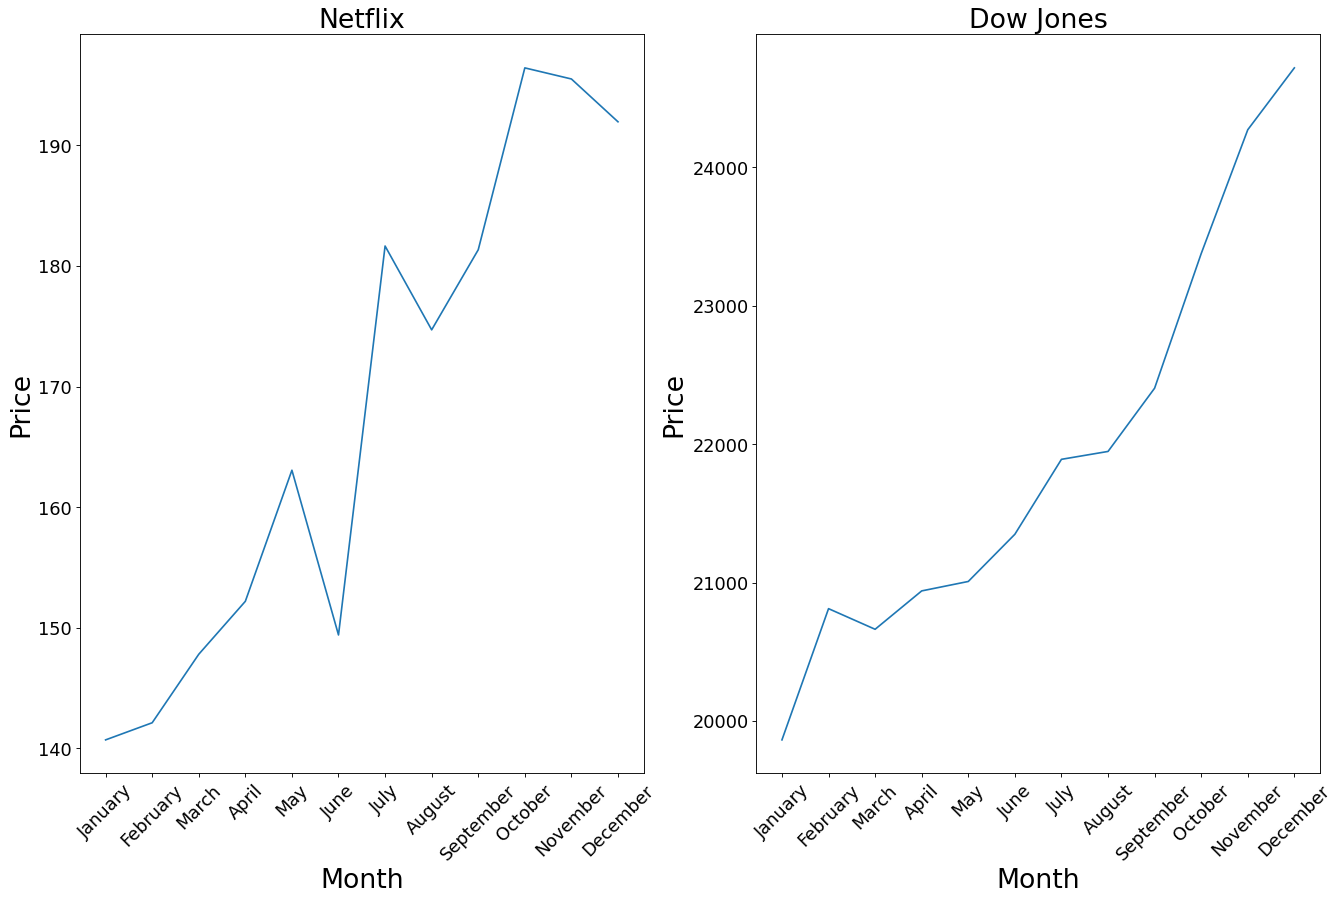

In [48]:
from matplotlib.pyplot import figure

figure(figsize=(20,12), dpi=80)
ax_netflix = plt.subplot(1, 2, 1)
plt.plot(df1['Month'], df1['Price'])
plt.title("Netflix", fontsize=24)
plt.ylabel("Price", fontsize=24)
plt.xlabel("Month", fontsize=24)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16, rotation=45)

ax_dj = plt.subplot(1, 2, 2)
plt.plot(df2['Month'], df2['Price'])
plt.title("Dow Jones", fontsize=24)
plt.ylabel("Price", fontsize=24)
plt.xlabel("Month", fontsize=24)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16, rotation=45)

plt.savefig("NetflixVsDowJones")
plt.show()

Netflix stocks seems to be more volatile than Dow Jones.